### Time series is used to train machine learning  model to predict the future values from the historical data

In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import itertools
import numpy as np
# plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')

In [2]:
#reading the data
data=pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,1446.939941,1482.949951,1446.420044,1464.699951,1464.699951,1859100
1,2020-07-06,1480.060059,1506.589966,1472.859985,1495.699951,1495.699951,1564000
2,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
4,2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,1510.989990,1423300


In [3]:
#converting the date which is in string format to date format
data2= pd.read_csv("GOOG.csv", parse_dates =["Date"], index_col ="Date")
data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-02,1446.939941,1482.949951,1446.420044,1464.699951,1464.699951,1859100
2020-07-06,1480.060059,1506.589966,1472.859985,1495.699951,1495.699951,1564000
2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,1510.989990,1423300


In [4]:
data2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1404700
2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300
2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,2527.370117,856000
2021-07-02,2536.790039,2576.959961,2535.379883,2572.580078,2572.580078,625480


In [ ]:
data processsing

In [5]:
#checking for missing values
data2.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

our data is clean

In [7]:
#we resample the data based on the months we apply it to the closing  price
monthly_data=data2.Close.resample('M').mean()
monthly_data

Date
2020-07-31    1517.169992
2020-08-31    1545.944749
2020-09-30    1518.553804
2020-10-31    1546.828186
2020-11-30    1748.348499
2020-12-31    1772.278182
2021-01-31    1808.383693
2021-02-28    2068.356824
2021-03-31    2059.844785
2021-04-30    2289.842367
2021-05-31    2352.595496
2021-06-30    2501.394098
2021-07-31    2549.975097
Freq: M, Name: Close, dtype: float64

#From here you can get some insight  on which month had the highest stock 

which in our dataset is is july 2021 

In [8]:
#resampling the data based on the weeks
weekly_data=data2.Close.resample('W').mean()
weekly_data

Date
2020-07-05    1464.699951
2020-07-12    1505.921997
2020-07-19    1515.821997
2020-07-26    1544.036011
2020-08-02    1513.393970
2020-08-09    1481.523975
2020-08-16    1501.843970
2020-08-23    1557.256006
2020-08-30    1625.507983
2020-09-06    1651.210010
2020-09-13    1535.522492
2020-09-20    1507.428003
2020-09-27    1437.015991
2020-10-04    1470.391992
2020-10-11    1480.180005
2020-10-18    1568.210010
2020-10-25    1588.036011
2020-11-01    1579.915991
2020-11-08    1710.097998
2020-11-15    1756.591992
2020-11-22    1760.884009
2020-11-29    1767.089996
2020-12-06    1808.309985
2020-12-13    1795.852002
2020-12-20    1753.948023
2020-12-27    1733.524994
2021-01-03    1756.552490
2021-01-10    1759.782007
2021-01-17    1748.808008
2021-01-24    1867.515014
2021-01-31    1869.256006
2021-02-07    2011.860034
2021-02-14    2094.359961
2021-02-21    2117.137451
2021-02-28    2059.825976
2021-03-07    2068.338037
2021-03-14    2061.717993
2021-03-21    2065.902002
2021-03

In [9]:
#Resampling the data on Quarterly frequency
quart=data2.Close.resample('Q').mean()
quart

Date
2020-09-30    1527.222848
2020-12-31    1687.301720
2021-03-31    1984.172129
2021-06-30    2383.639203
2021-09-30    2549.975097
Freq: Q-DEC, Name: Close, dtype: float64

FRom the above data we can see  sept quarterly had the highest  returns

In [10]:
#using the closing sales of date 1 of the month as the timestamp
y=data2['Close'].resample('MS').mean()
y

Date
2020-07-01    1517.169992
2020-08-01    1545.944749
2020-09-01    1518.553804
2020-10-01    1546.828186
2020-11-01    1748.348499
2020-12-01    1772.278182
2021-01-01    1808.383693
2021-02-01    2068.356824
2021-03-01    2059.844785
2021-04-01    2289.842367
2021-05-01    2352.595496
2021-06-01    2501.394098
2021-07-01    2549.975097
Freq: MS, Name: Close, dtype: float64

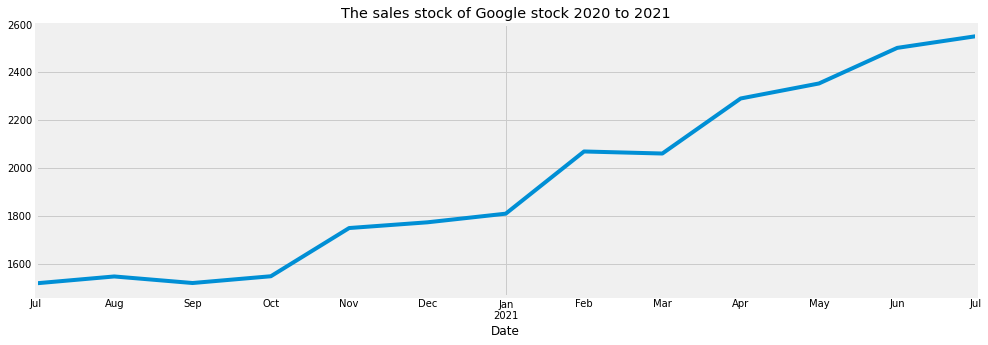

In [11]:
plt.figure(figsize=(15,5))
y.plot()
plt.title('The sales stock of Google stock 2020 to 2021')
plt.show()


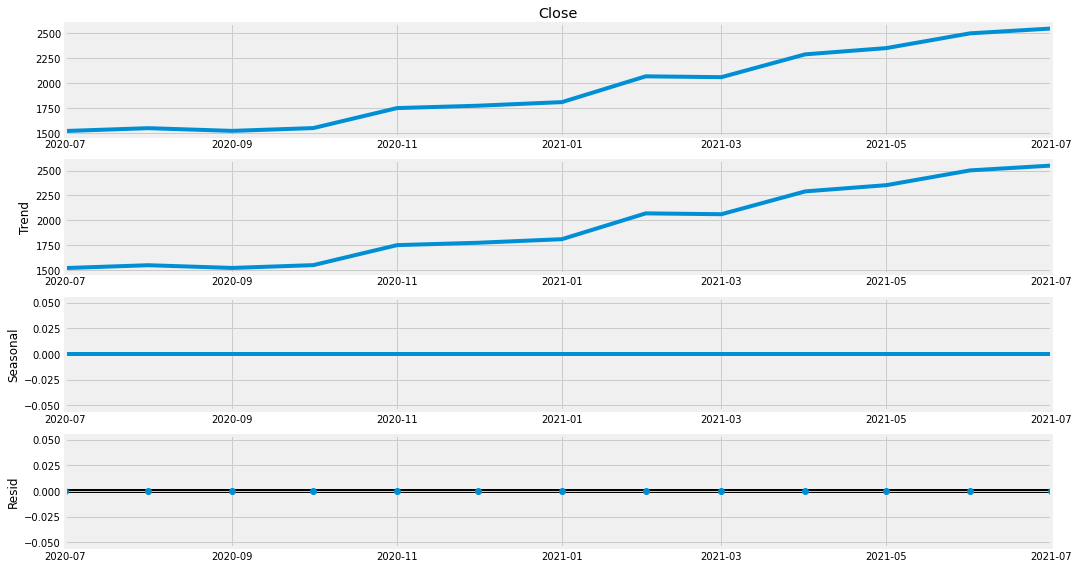

In [12]:
#'Time series decomposition based on trend,season and Noise of the data
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive',period=1,)
fig = decomposition.plot()
plt.show()


From the above graphs we can see the stock price of GOOgle stock is not affected by season

# Time Series Forecasting with ARIMA

In [13]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Parameters combination of seasonal ARIMA')
print('SARIMAX :{} x {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameters combination of seasonal ARIMA
SARIMAX :(0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
# selecting the best parameter combination
for params in pdq:
    for params_seasonal in seasonal_pdq:
        try:
            mode=sm.tsa.statespace.SARIMAX(y,order=params,seasonal_order=params_seasonal,
                                            enforce_stationarity=False,
                  
                                           enforse_invertibilty=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(params, params_seasonal, results.aic))
        except:
            continue

          

      
    
    
    
    
    

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(

In [23]:
from pmdarima import auto_arima
result=auto_arima(data2['Close'],seasonal=True,m=12).summary()
result

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  253
Model:             SARIMAX(0, 1, 0)x(2, 0, [1], 12)   Log Likelihood               -1221.077
Date:                              Fri, 05 Nov 2021   AIC                           2452.154
Time:                                      00:41:10   BIC                           2469.801
Sample:                                           0   HQIC                          2459.255
                                              - 253                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.1855      3.711      2.475      0.013       1.912      16.459
ar.S.L12      -0.8970      0.232     -3.869      0.000      -1.351      -0.443
ar.S.L24      -0.1804      0.071     -2.525      0.012      -0.320      -0.040
ma.S.L12       0.7924      0.237      3.342      0.001       0.328       1.257
sigma2       942.6421     61.447     15.341      0.000     822.208    1063.076
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                44.60
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.22
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/karimi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.5672   6493.274      0.000      1.000   -1.27e+04    1.27e+04
ar.S.L24      -0.6197   6308.510  -9.82e-05      1.000   -1.24e+04    1.24e+04
ma.S.L12       0.0308   1.06e+04    2.9e-06      1.000   -2.08e+04    2.08e+04
sigma2       595.9618      3.077    193.674      0.000     589.931     601.993


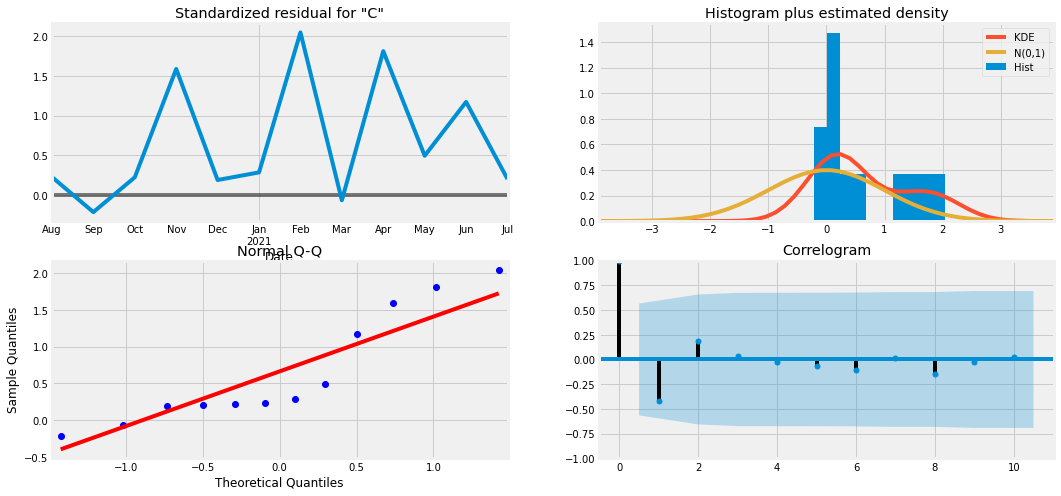

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

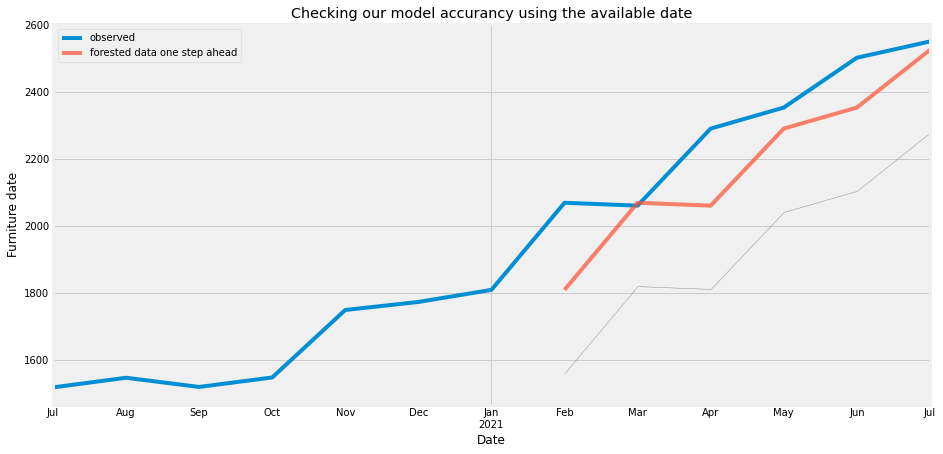

In [17]:
pred=results.get_prediction(start=pd. to_datetime("2021-02-01 "))
pred_ci=pred.conf_int()
ax=y['2020':].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label='forested data one step ahead',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture date')
plt.title('Checking our model accurancy using the available date')
plt.legend()
plt.show()

The picture is aligned with the actual sales, really well, which is showing an upward shift in the beginning and 


captures the seasonality at the end of the year.

In [27]:
#checking the mean square error of the predicted data
y_forested=pred.predicted_mean
y_truth=y['2021-02-01':]
mse=((y_forested-y_truth) **2).mean()
print('The predicted mean square error is :', mse)

The predicted mean square error is : 24546.054382281112


In [30]:
sqrt=np.sqrt(mse)
print('The square root of mean square error is ', sqrt)

The square root of mean square error is  156.67180468189264


## from the above we can see our model is okay so we can use it to predict the future stock prices

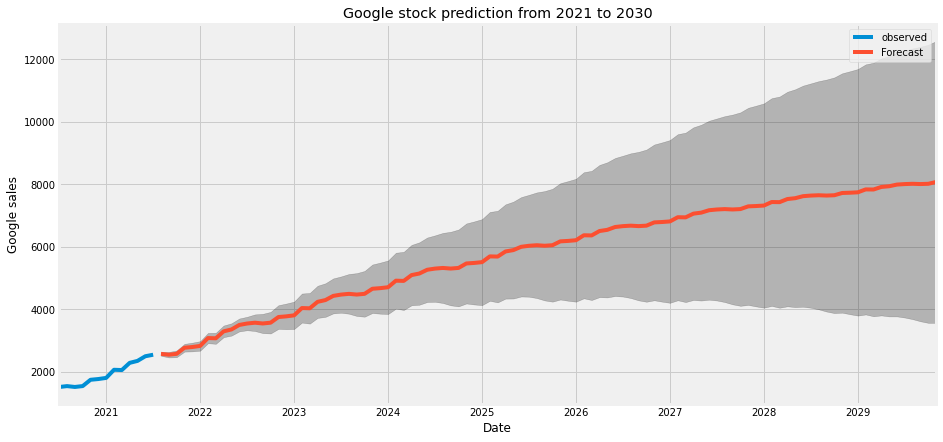

In [27]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Google sales')
plt.title('Google stock prediction from 2021 to 2030')
plt.legend()
plt.show()